
# **Analytics 2 : <font color=#DF4807> Python for Data Science**


Objectives:
1. Practice basic functions / operations in Python for Data science
2. Explore the Wine Quality Dataset (Cortez, Cerdeira, Almeida, Matos, & Reis, 2009)
3. Model wine quality using the best predictors.

## **Python Libraries for Data Science**

In [180]:
#import libs
import pandas as pd # importing, analyzing, cleaning, exploring & manipulating data



## **Loading the Data from url:**


In [181]:
#Read in data from url
url='https://drive.google.com/file/d/1q_ss-nbcRfZ8QFpSMHaCWqCBEl8yGElX/view?usp=share_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url, encoding='latin-1')

## **Data Exploration: Missing Values and Dependant Variable**

⭐: **Task 1: (15 min)**

A few things we have to check for:
<br> a) Check for null or missing values in data. Decide on the appropriate way to deal with them.
<br> b) Plot the dependant variable "Quality". What do the plots show us?
<br> c) Create a correlation chart so we can see the correlation of features against eachother. What intuitions can be drawn?
<br> d) Check for any outliers
<br> e) Take note of any interesting characteristics of the data.

In [182]:
df.shape

(6497, 13)

In [183]:
#your code here
# print(df.isna().sum(), 'sum of null values')
for col in df.columns:
    percentile = (df[col].isna().sum()/df.shape[0])*100
    
    # percentile = ((each/df.shape[0])*100)
    if percentile <= 0.1:
        
        df.dropna(subset=[col],inplace=True)
    else:
        df[col].fillna(df[col].mean(),inplace=True, axis=0)




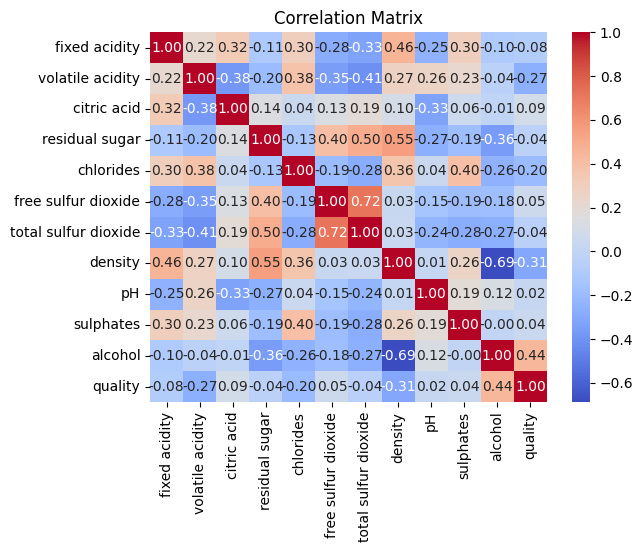

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [185]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [186]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [187]:
df.shape

(6486, 13)

In [189]:
ohe = pd.get_dummies(df['type'])
df.drop('type',axis=1,inplace=True)
df = pd.concat([df, ohe], axis=1)

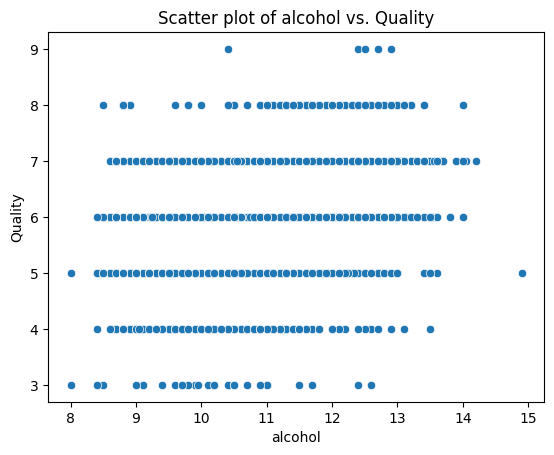

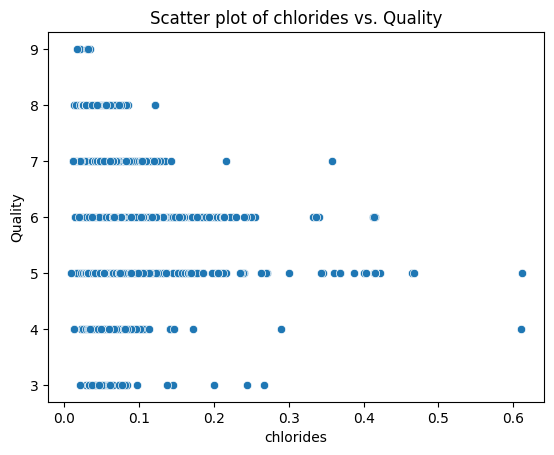

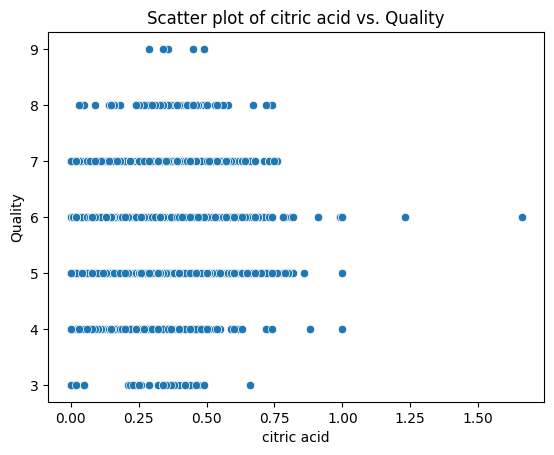

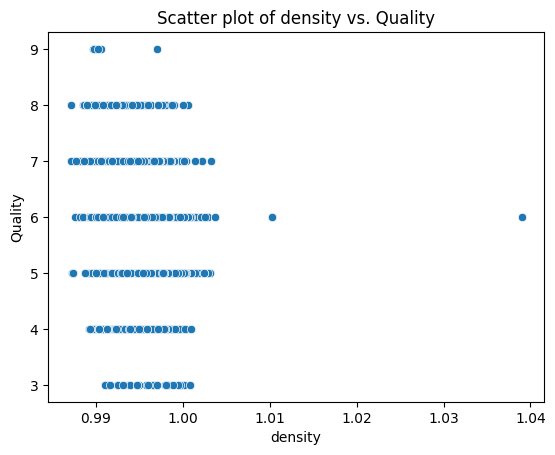

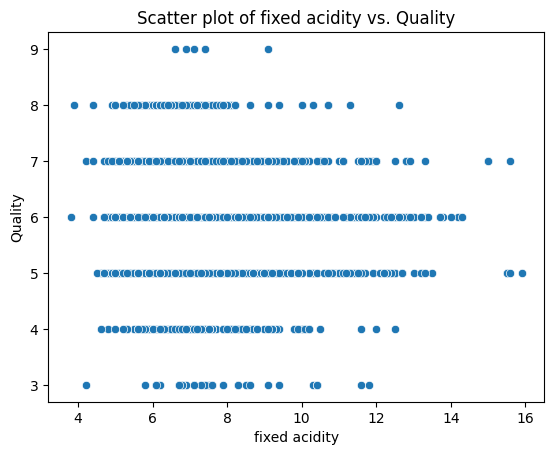

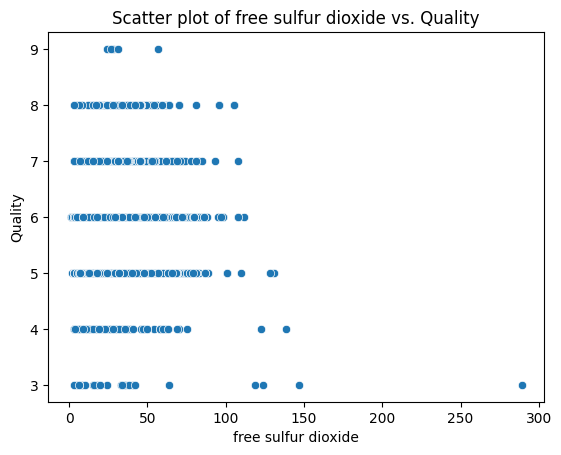

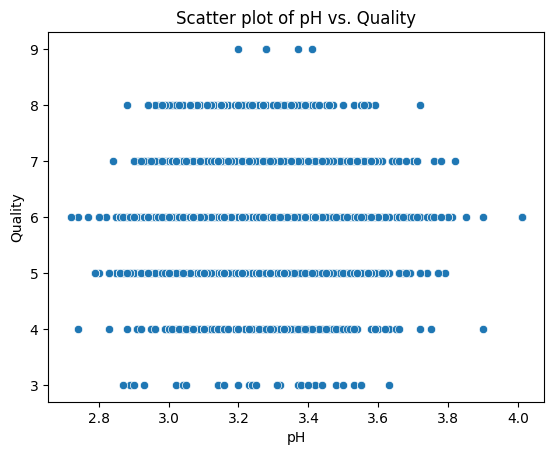

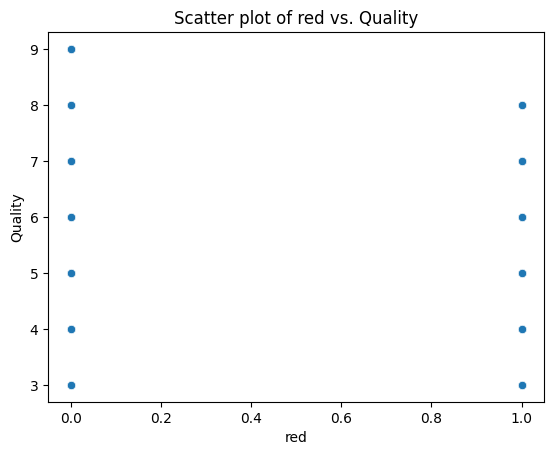

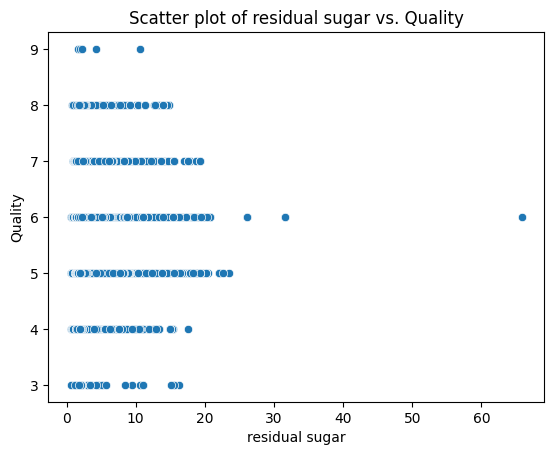

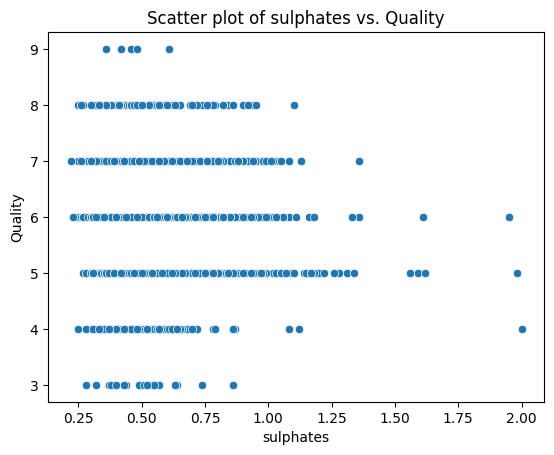

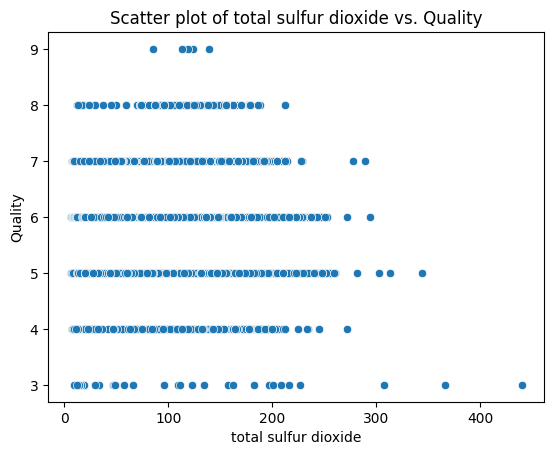

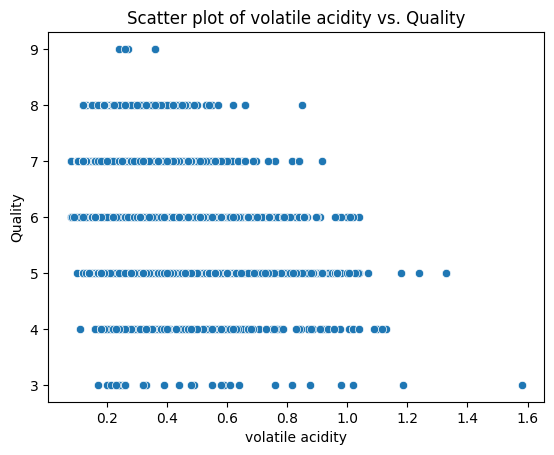

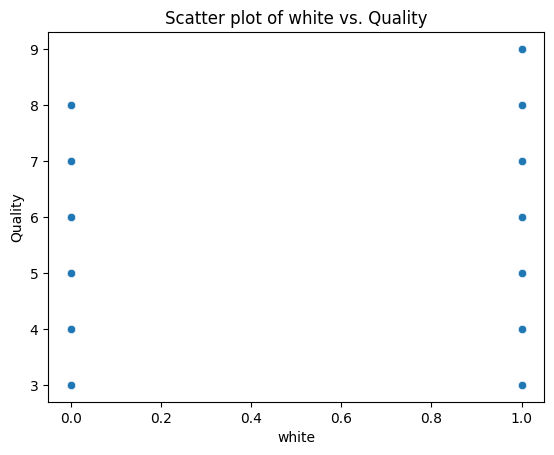

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate over each column in the DataFrame except 'quality'
for column in df.columns.difference(['quality']):
    sns.scatterplot(x=column, y='quality', data=df)
    plt.xlabel(column)  # Set the label for the x-axis
    plt.ylabel('Quality')  # Set the label for the y-axis
    plt.title(f'Scatter plot of {column} vs. Quality')  # Set the title of the plot
    plt.show()  # Display the plot


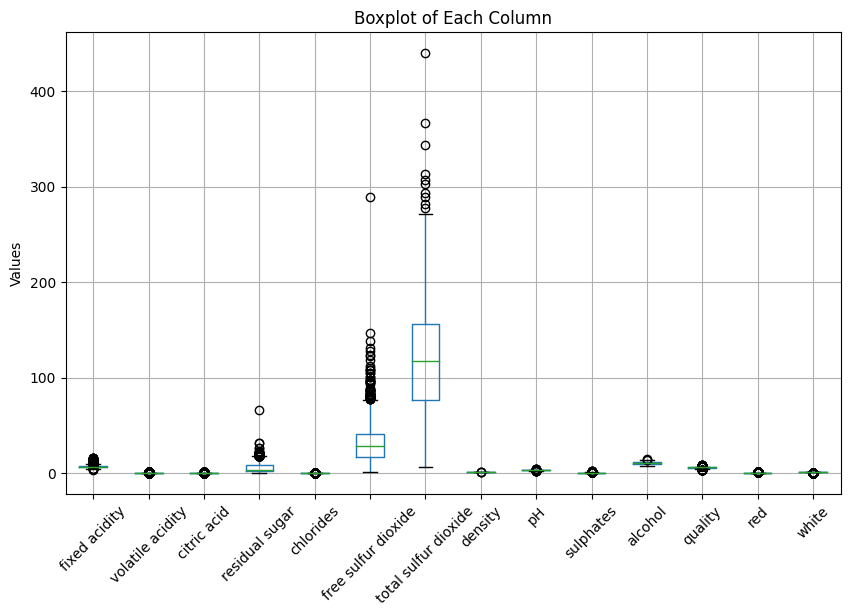

In [191]:
import pandas as pd
import matplotlib.pyplot as plt

# Create boxplots for each column in the DataFrame
df.boxplot(figsize=(10, 6))  # Adjust figsize as needed
plt.title('Boxplot of Each Column')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [192]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red', 'white'],
      dtype='object')

In [193]:
for each in ['free sulfur dioxide','total sulfur dioxide']:
    # Calculate the first quartile (Q1)
    Q1 = df[each].quantile(0.25)

    # Calculate the third quartile (Q3)
    Q3 = df[each].quantile(0.90)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers from the column
    df_filtered = df[(df[each] >= lower_bound) & (df[each] <= upper_bound)]




In [194]:
df[['free sulfur dioxide','total sulfur dioxide']].describe()

,free sulfur dioxide,total sulfur dioxide
count,6486.000000,6486.000000
mean,30.512720,115.727336
std,17.746728,56.511430
min,1.000000,6.000000
25%,17.000000,77.125000
50%,29.000000,118.000000
75%,41.000000,156.000000
max,289.000000,440.000000


In [195]:
df_filtered[['free sulfur dioxide','total sulfur dioxide']].describe()

,free sulfur dioxide,total sulfur dioxide
count,6484.000000,6484.000000
mean,30.472085,115.638649
std,17.456568,56.290310
min,1.000000,6.000000
25%,17.000000,77.000000
50%,29.000000,118.000000
75%,41.000000,156.000000
max,146.500000,344.000000


In [196]:
print(df.isna().sum(), 'sum of null values')


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red                     0
white                   0
dtype: int64 sum of null values


## **Data Preparation: Sorting and Aggregating**

⭐: **Task 2: (15 min)**
<br> a) Randomly select 70% of your data. This will be your training data.
<br> b) Transfer the "Quality" column from your training data to your yTrain.
<br> c) Using the remaining 30%, do the same for your test data.

<br> Replace "None" with your own code.

In [197]:
# Your code here:
#Training Data
xTrain = None
yTrain = None

#Test Data
xTest = None
yTest = None


⭐: **Task 3: (5 min)**
<br> a) create new data frame called meanData by aggregating df to mean.
<br> Replace "None" with your own code.

In [198]:
meanData = None

⭐: **Task 4: (15 min)**
Model Fitting KNN:

Given your data, what model do you think makes sense? Select a model and fit your data. Also evaluate your model with an appropriate metric.





In [1]:
pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 1.3 MB/s eta 0:00:08
    --------------------------------------- 0.2/9.9 MB 2.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/9.9 MB 5.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/9.9 MB 6.3 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/9.9 MB 7.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.0/9.9 MB 8.1 MB/s eta 0:00:01
   ---------- ----------------------------- 2.6/9.9 MB 8.7 MB/s eta 0:00:01
   ------------ --------------------------- 3.1/9.9 MB 8.9 MB/s eta 0:00:01
   -------------- ------------------------- 3.6/9.9 MB 9.2 MB/s eta 0:00:01
   ---------------- ----------------------- 4.1/9.9 MB 9.4 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.9 MB 9.6 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.9 MB 10.0 MB/s eta 0:00:01
   ---------------

In [200]:
import statsmodels.api as sm
import numpy as np

# Generate some example data
np.random.seed(0)
y = df['quality']
X = df.drop('quality',axis=1)
# Add a constant term to the independent variable matrix for the intercept term
X = sm.add_constant(X)

# Create a linear regression model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()

# Print the summary of the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     227.6
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:49:44   Log-Likelihood:                -7181.3
No. Observations:                6486   AIC:                         1.439e+04
Df Residuals:                    6473   BIC:                         1.448e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   69.6523 

In [201]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red', 'white'],
      dtype='object')

In [202]:
X = df[['fixed acidity','free sulfur dioxide','pH','sulphates', 'alcohol']]

In [203]:
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red', 'white'],
      dtype='object')

In [204]:
#your code here

df['alcohol'].value_counts()
df['quality'].value_counts()

6    2830
5    2136
7    1078
4     214
8     193
3      30
9       5
Name: quality, dtype: int64

In [205]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the Iris dataset
# data = load_iris()
y = df['quality']
X = df.drop('quality',axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.11      0.17      0.14        35
           5       0.45      0.54      0.49       407
           6       0.53      0.53      0.53       575
           7       0.47      0.33      0.39       232
           8       0.08      0.03      0.04        39

    accuracy                           0.47      1298
   macro avg       0.27      0.27      0.26      1298
weighted avg       0.46      0.47      0.46      1298



c:\Users\Poorn\anaconda3\envs\gpu\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [206]:
knn.score(X_test,y_test)

c:\Users\Poorn\anaconda3\envs\gpu\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.46841294298921415

In [207]:
df.shape

(6486, 14)

In [208]:
X = df[['fixed acidity','free sulfur dioxide','pH','sulphates', 'alcohol']]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the Iris dataset
# data = load_iris()
y = df['quality']
X = df.drop('quality',axis=1)
print(X.shape)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the classifier

print(knn.score(X_test,y_test))

(6486, 13)
0.46841294298921415


c:\Users\Poorn\anaconda3\envs\gpu\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Poorn\anaconda3\envs\gpu\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

## **Visualizing your fit: for KNN**
⭐: **Task 5: (15 min)**
Data Visualitzaions:

Visualize your model as compared to the data. What intuitions can you draw from the visual?


In [209]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.11      0.17      0.14        35
           5       0.45      0.54      0.49       407
           6       0.53      0.53      0.53       575
           7       0.47      0.33      0.39       232
           8       0.08      0.03      0.04        39

    accuracy                           0.47      1298
   macro avg       0.27      0.27      0.26      1298
weighted avg       0.46      0.47      0.46      1298



⭐: **Task 4: (15 min)**
Model Fitting for RandomForestClassifier:

Given your data, what model do you think makes sense? Select a model and fit your data. Also evaluate your model with an appropriate metric.





In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the iris dataset


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the classifier



In [211]:
clf.score(X_test,y_test)

0.6756548536209553

## **Visualizing your fit: for Random forest**
⭐: **Task 5: (15 min)**
Data Visualitzaions:

Visualize your model as compared to the data. What intuitions can you draw from the visual?


In [212]:
#your code here
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       1.00      0.14      0.25        35
           5       0.69      0.72      0.70       407
           6       0.65      0.77      0.70       575
           7       0.74      0.53      0.62       232
           8       1.00      0.26      0.41        39

    accuracy                           0.68      1298
   macro avg       0.68      0.40      0.45      1298
weighted avg       0.69      0.68      0.66      1298



c:\Users\Poorn\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Poorn\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Poorn\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
